In [1]:
#from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\tensorflow\python\frame

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
#parameters that are going to be used by the NN
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

#network Parameters
n_hidden_1 = 256
n_hidden_2 = 128
n_input = 784

#tf graph input 
x = tf.placeholder("float",[None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
    
}

In [3]:
#build the encoder
def encoder(x):
    #encoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_h1']),biases['encoder_b1']))
    ##encoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['encoder_h2']),biases['encoder_b2']))
    return layer_2


In [4]:
#building the decoder
def decoder(x):
    #decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_h1']),biases['decoder_b1']))
    #decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['decoder_h2']),biases['decoder_b2']))
    return layer_2


In [5]:
#construct the model
encoder_op = encoder(x)
decoder_op = decoder(encoder_op)

#reconstructed images
y_pred = decoder_op
#target (labels) are the input data:
y_true = x

#Define loss and optimizer, minimze the square error
cost = tf.reduce_mean(tf.pow(y_true - y_pred,2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

#Initializing the variables
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
#training for 20 epochs
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)
#Training cycle
for epoch in range(training_epochs):
    #Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        #run optimization op(backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs})
    #display logs
    if epoch % display_step ==0:
        print("Epoch:","%04d"%(epoch+1),
             "cost=","{:,.9f}".format(c))
        
print("Optimization Finished!")

Epoch: 0001 cost= 0.208398670
Epoch: 0002 cost= 0.168442965
Epoch: 0003 cost= 0.152520403
Epoch: 0004 cost= 0.145586371
Epoch: 0005 cost= 0.139653131
Epoch: 0006 cost= 0.132523581
Epoch: 0007 cost= 0.129415691
Epoch: 0008 cost= 0.121535249
Epoch: 0009 cost= 0.117624164
Epoch: 0010 cost= 0.117850408
Epoch: 0011 cost= 0.116340473
Epoch: 0012 cost= 0.115659997
Epoch: 0013 cost= 0.114397615
Epoch: 0014 cost= 0.110216863
Epoch: 0015 cost= 0.111150198
Epoch: 0016 cost= 0.106906027
Epoch: 0017 cost= 0.108106479
Epoch: 0018 cost= 0.107501827
Epoch: 0019 cost= 0.105388872
Epoch: 0020 cost= 0.101753607
Optimization Finished!


In [10]:
#applying the encoder and decoder over test set
encode_decode = sess.run(
y_pred,feed_dict={x:mnist.test.images[:examples_to_show]})

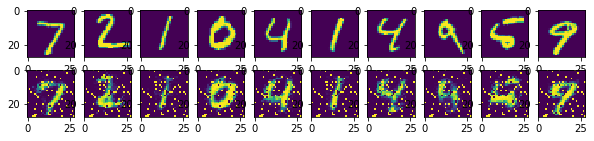

In [11]:
#compare original images with their reconstructions
f,a = plt.subplots(2,10,figsize=(10,2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[1][i].imshow(np.reshape(encode_decode[i],(28,28)))